# Model output comparison

Here we run the Stroke+Rehab models for stage one and two (our internal replication test) and compare the quantitative results.

This notebook assume that it is in the same directory as the following Python modules:

* `stroke_rehab_model.py`  (produced in stage 1 of the study)
* `s2_stroke_rehab_model` (produced in the internal replication test)


The notebook generates:

1. Tablular summaries of results for the stage 1 and stage 2 models.
2. Graphical comparison (two figures: one each for acute and rehab) comparing probability of delay and occupancy of stage 1/2 models.

## 1. Imports

### 1.1 General imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# use fast style defaults for matplotlib plotting
plt.style.use("fast")

### 1.2 Stroke+Rehab stage 1 code

In [2]:
from stroke_rehab_model import (
    Experiment,
    multiple_replications,
    combine_pdelay_results,
    combine_occup_results,
    mean_results,
    prob_delay_plot,
    occupancy_plot,
    summary_table,
)

### 1.3 Stroke+rehab stage 2 code

In [3]:
from s2_stroke_rehab_model import (
    Experiment as Experiment2,
    multiple_replications as multiple_replications2,
    combine_pdelay_results as combine_pdelay_results2,
    combine_occup_results as combine_occup_results2,
    mean_results as mean_results2,
    prob_delay_plot as prob_delay_plot2,
    occupancy_plot as occupancy_plot2,
    summary_table as summary_table2,
)

## 2. Plotting functions.

> Note these are modified versions of stage 1 code. This modification was made to allow a user to plot charts on the same axis for comparison.

In [4]:
def modified_prob_delay_plot(
    prob_delay,
    unique_values,
    y_label="Probability of Delay",
    subtitle="stage 1",
    fig_size=(12, 5),
    ax=None,
):
    """
    Modified prob delay plotting function. This now includes an `ax`
    parameter to allows a user to use the function and add the result
    to an existing plot.
    """
    # create if no axis provided.
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)

    ax.step(unique_values, prob_delay, where="post")

    # Dynamically set x-axis ticks based on the range of unique values
    max_value = max(unique_values)
    # Ensure at least 10 ticks, but not more than the number of unique values
    tick_step = max(1, max_value // 10)
    ax.set_xticks(np.arange(0, max_value + 1, tick_step))

    # ax.set_xlabel(x_label, fontsize=9)
    ax.set_ylabel("Probability of Delay", fontsize=9)
    ax.grid(axis="both", linestyle="--", alpha=0.6)

    ax.set_title(subtitle, fontsize=8)

    return ax.get_figure(), ax

In [5]:
def modified_occupancy_plot(
    relative_frequency,
    unique_values,
    y_label="Relative frequency",
    fig_size=(12, 5),
    ax=None,
    subtitle=None,
):
    """MODIFIED func to generate a plot of the occupancy relative
    frequency distribution.

    This now includes an `ax`
    parameter to allows a user to use the function and add the result
    to an existing plot.

    Parameters:
    - relative_frequency (numpy.ndarray):
        The relative frequencies of occupancy levels.
    - unique_values (numpy.ndarray): The unique occupancy levels observed.
    - x_label (str): The label for the x-axis.
    - fig_size (tuple): The size of the figure.

    Returns:
    - matplotlib.figure.Figure, matplotlib.axes.Axes:
    The figure and axes of the plot.
    """

    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
    ax.bar(unique_values, relative_frequency, align="center", alpha=0.7)

    # Dynamically set x-axis ticks based on the range of unique values
    max_value = max(unique_values)
    # Ensure at least 10 ticks, but not more than the number of unique values
    tick_step = max(1, max_value // 10)
    ax.set_xticks(np.arange(0, max_value + 1, tick_step))
    # ax.set_ylim(0, 0.15)
    # ax.set_xlabel(x_label, fontsize=9)
    ax.set_ylabel("Relative Frequency", fontsize=9)
    ax.grid(axis="y", linestyle="--", alpha=0.6)
    ax.set_title(subtitle, fontsize=8)
    # plt.title('Occupancy Relative Frequency Distribution')
    # plt.tight_layout()
    return ax.get_figure(), ax

## 3. Run experiments with both models

Here we perform a full run of the models and compare the results using the tabular format of the original publication.

### 3.1 Stage 1 run function

In [6]:
def get_mean_results(rep_results):
    """Combine replication results and return the mean distribution"""
    pd_asu, pd_rehab = combine_pdelay_results(rep_results)
    rel_asu, rel_rehab = combine_occup_results(rep_results)
    mean_pd_asu, mean_pd_rehab = mean_results(pd_asu), mean_results(pd_rehab)
    mean_rel_asu, mean_rel_rehab = mean_results(rel_asu), mean_results(
        rel_rehab
    )
    return mean_pd_asu, mean_pd_rehab, mean_rel_asu, mean_rel_rehab

In [7]:
def run_stage_1():
    """Base run of stage 1 model. Results tabular results for acute and rehab"""
    results_dict = {}

    # create experiment
    default_experiment = Experiment()

    # conduct multiple independent replications and store results
    rep_results = multiple_replications(
        default_experiment, num_replications=100
    )

    # combine replication results into single table and calculate the mean distribution
    mean_pd_asu, mean_pd_rehab, mean_rel_asu, mean_rel_rehab = (
        get_mean_results(rep_results)
    )

    # store results in dict to return
    results_dict["mean_pd_asu"] = mean_pd_asu
    results_dict["mean_pd_rehab"] = mean_pd_rehab
    results_dict["mean_rel_asu"] = mean_rel_asu
    results_dict["mean_rel_rehab"] = mean_rel_rehab

    # tabular results
    df_acute = summary_table(mean_pd_asu, 9, 14, "acute")
    df_rehab = summary_table(mean_pd_rehab, 10, 16, "rehab")

    return df_acute, df_rehab, results_dict

### 3.2 Stage 2 run function

In [8]:
def get_mean_results_s2(rep_results):
    """Combine replication results and return the mean distribution STAGE 2"""
    pd_asu, pd_rehab = combine_pdelay_results2(rep_results)
    rel_asu, rel_rehab = combine_occup_results2(rep_results)
    mean_pd_asu, mean_pd_rehab = mean_results2(pd_asu), mean_results2(pd_rehab)
    mean_rel_asu, mean_rel_rehab = mean_results2(rel_asu), mean_results2(
        rel_rehab
    )
    return mean_pd_asu, mean_pd_rehab, mean_rel_asu, mean_rel_rehab

In [9]:
def run_stage_2():
    """Base run of stage 2 model. Results tabular results for acute and rehab.

    Note that the functions and classes are postfixed with 2"""
    # create experiment
    default_experiment = Experiment2()

    results_dict = {}

    # conduct multiple independent replications and store results
    rep_results = multiple_replications2(
        default_experiment, num_replications=100
    )

    # combine replication results into single table and calculate the mean distribution
    mean_pd_asu, mean_pd_rehab, mean_rel_asu, mean_rel_rehab = (
        get_mean_results_s2(rep_results)
    )

    # store results in dict to return
    results_dict["mean_pd_asu"] = mean_pd_asu
    results_dict["mean_pd_rehab"] = mean_pd_rehab
    results_dict["mean_rel_asu"] = mean_rel_asu
    results_dict["mean_rel_rehab"] = mean_rel_rehab

    df_acute = summary_table2(mean_pd_asu, 9, 14, "acute")
    df_rehab = summary_table2(mean_pd_rehab, 10, 16, "rehab")

    return df_acute, df_rehab, results_dict

### 3.3 Tabular comparison

In [10]:
df_acute_s1, df_rehab_s1, results_dict_s1 = run_stage_1()

In [11]:
df_acute_s2, df_rehab_s2, results_dict_s2 = run_stage_2()

#### 3.3.1 Acute tables

In [12]:
# stage 1
df_acute_s1

,p(delay),1 in every n patients delayed
No. acute beds,,
9,0.18,5
10,0.13,7
11,0.09,11
12,0.06,17
13,0.03,28
14,0.02,51


In [13]:
# stage 2
df_acute_s2

,Probability of delay,% patients delayed,1 in every n patients delayed
No. acute beds,,,
9,0.18,18.3%,5
10,0.13,13.2%,7
11,0.09,8.9%,11
12,0.06,5.7%,17
13,0.03,3.5%,28
14,0.02,2.0%,51


#### 3.3.2 Rehab tables

In [14]:
df_rehab_s1

,p(delay),1 in every n patients delayed
No. rehab beds,,
10,0.21,4
11,0.15,6
12,0.11,8
13,0.08,12
14,0.05,18
15,0.03,31
16,0.02,50


In [15]:
df_rehab_s2

,Probability of delay,% patients delayed,1 in every n patients delayed
No. rehab beds,,,
10,0.21,20.6%,4
11,0.15,15.5%,6
12,0.11,11.2%,8
13,0.08,7.8%,12
14,0.05,5.3%,18
15,0.03,3.2%,31
16,0.02,2.0%,50


### 3.4 Graphical comparison

#### 3.4.1 Acute Stroke Unit

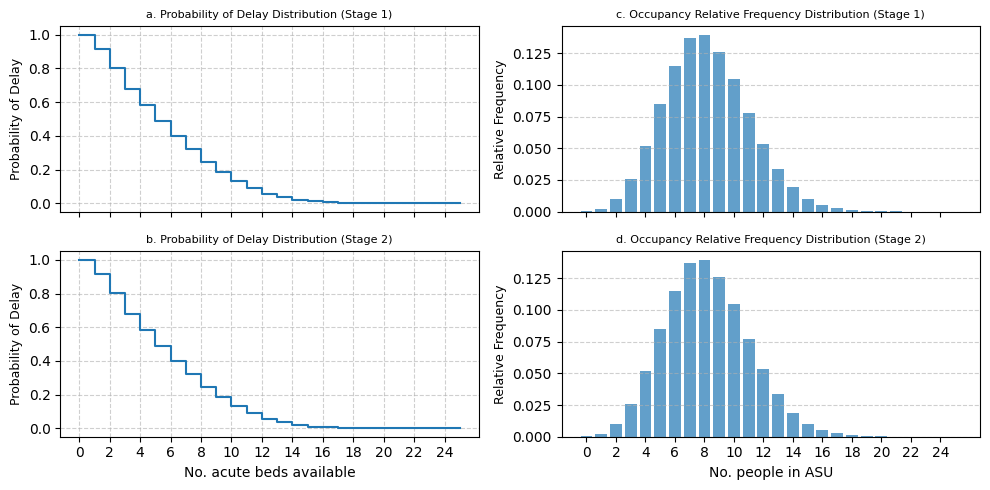

In [16]:
fig, (top, bottom) = plt.subplots(
    ncols=2, nrows=2, sharex="col", figsize=(10, 5)
)

# plots
plots = {}
# prob delay plots
# stage 1
fig, top[0] = modified_prob_delay_plot(
    results_dict_s1["mean_pd_asu"],
    np.arange(len(results_dict_s1["mean_pd_asu"])),
    subtitle="a. Probability of Delay Distribution (Stage 1)",
    ax=top[0],
)
# stage 2
fig, bottom[0] = modified_prob_delay_plot(
    results_dict_s2["mean_pd_asu"],
    np.arange(len(results_dict_s2["mean_pd_asu"])),
    subtitle="b. Probability of Delay Distribution (Stage 2)",
    ax=bottom[0],
)

top[0].set_ylabel("Probability of Delay")


# occupancy plots
# stage 1
fig, top[1] = modified_occupancy_plot(
    results_dict_s1["mean_rel_asu"],
    np.arange(len(results_dict_s1["mean_pd_asu"])),
    ax=top[1],
    subtitle="c. Occupancy Relative Frequency Distribution (Stage 1)",
)

# stage 2
fig, bottom[1] = modified_occupancy_plot(
    results_dict_s2["mean_rel_asu"],
    np.arange(len(results_dict_s2["mean_pd_asu"])),
    ax=bottom[1],
    subtitle="d. Occupancy Relative Frequency Distribution (Stage 2)",
)


bottom[0].set_xlabel("No. acute beds available")
bottom[1].set_xlabel("No. people in ASU")

fig.tight_layout()

In [17]:
# save the figure to file
fig.savefig("asu_comparison.png", dpi=300, bbox_inches="tight")

#### 3.4.2 Rehabilitation unit

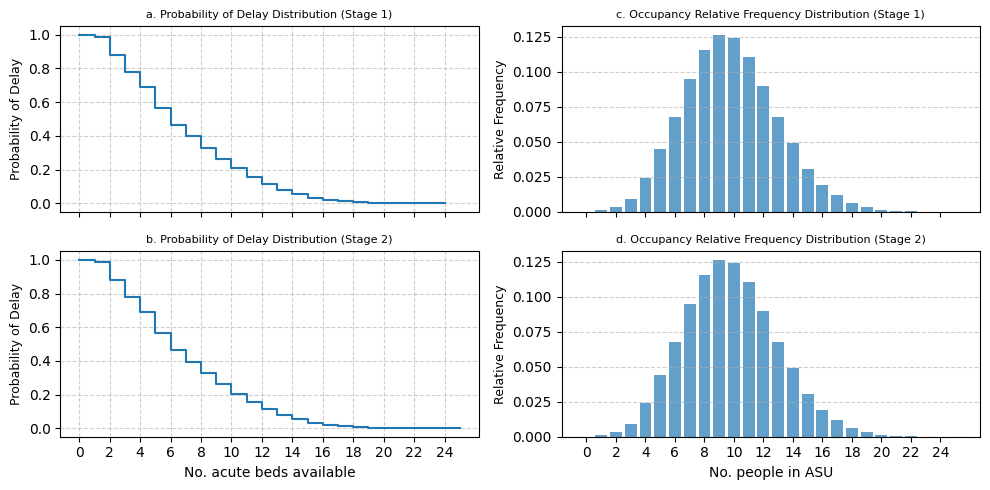

In [18]:
plt.style.use("fast")

fig, (top, bottom) = plt.subplots(
    ncols=2, nrows=2, sharex="col", figsize=(10, 5)
)

# plots
plots = {}
# prob delay plots
# stage 1
fig, top[0] = modified_prob_delay_plot(
    results_dict_s1["mean_pd_rehab"],
    np.arange(len(results_dict_s1["mean_pd_rehab"])),
    subtitle="a. Probability of Delay Distribution (Stage 1)",
    ax=top[0],
)
# stage 2
fig, bottom[0] = modified_prob_delay_plot(
    results_dict_s2["mean_pd_rehab"],
    np.arange(len(results_dict_s2["mean_pd_rehab"])),
    subtitle="b. Probability of Delay Distribution (Stage 2)",
    ax=bottom[0],
)

top[0].set_ylabel("Probability of Delay")


# occupancy plots
# stage 1
fig, top[1] = modified_occupancy_plot(
    results_dict_s1["mean_rel_rehab"],
    np.arange(len(results_dict_s1["mean_pd_rehab"])),
    ax=top[1],
    subtitle="c. Occupancy Relative Frequency Distribution (Stage 1)",
)

# stage 2
fig, bottom[1] = modified_occupancy_plot(
    results_dict_s2["mean_rel_rehab"],
    np.arange(len(results_dict_s2["mean_pd_rehab"])),
    ax=bottom[1],
    subtitle="d. Occupancy Relative Frequency Distribution (Stage 2)",
)


bottom[0].set_xlabel("No. acute beds available")
bottom[1].set_xlabel("No. people in ASU")

fig.tight_layout()

In [19]:
fig.savefig("rehab_comparison.png", dpi=300, bbox_inches="tight")

## 4. Statistical tests

### 4.1 Analysis functions

In [20]:
def statistical_comparison(results_s1, results_s2, alpha=0.05):
    """
    Perform statistical comparison between Stage 1 and Stage 2 model outputs.
    
    Parameters
    ----------
    results_s1: dict
        Stage 1 results.
    results_s2: dict
        Stage 2 results.
    alpha: float
        Significance level for confidence intervals.

    Returns
    -------
    Dictionary containing statistical test results
    """
    
    comparison_results = {}
    
    # Define the metrics to compare
    metrics = ['mean_pd_asu', 'mean_pd_rehab', 'mean_rel_asu', 'mean_rel_rehab']
    metric_names = {
        'mean_pd_asu': 'ASU Probability of Delay',
        'mean_pd_rehab': 'Rehab Probability of Delay', 
        'mean_rel_asu': 'ASU Occupancy',
        'mean_rel_rehab': 'Rehab Occupancy'
    }
    
    for metric in metrics:
        s1_data = results_s1[metric]
        s2_data = results_s2[metric]
        
        # Ensure arrays are same length (pad with zeros if needed)
        max_len = max(len(s1_data), len(s2_data))
        s1_padded = np.pad(s1_data, (0, max_len - len(s1_data)), 'constant')
        s2_padded = np.pad(s2_data, (0, max_len - len(s2_data)), 'constant')
        
        # Paired t-test
        t_stat, p_value = stats.ttest_rel(s1_padded, s2_padded)
        
        # Calculate differences
        differences = s1_padded - s2_padded
        mean_diff = np.mean(differences)
        std_diff = np.std(differences, ddof=1)
        
        # Confidence interval for mean difference
        n = len(differences)
        t_critical = stats.t.ppf(1 - alpha/2, n-1)
        margin_error = t_critical * (std_diff / np.sqrt(n))
        ci_lower = mean_diff - margin_error
        ci_upper = mean_diff + margin_error
        
        # Effect size (Cohen's d)
        pooled_std = np.sqrt(
            (np.var(s1_padded, ddof=1) + np.var(s2_padded, ddof=1)) / 2)
        cohens_d = mean_diff / pooled_std if pooled_std != 0 else 0
        
        # Statistical significance
        is_significant = p_value < alpha
        
        comparison_results[metric] = {
            'metric_name': metric_names[metric],
            't_statistic': t_stat,
            'p_value': p_value,
            'mean_difference': mean_diff,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'cohens_d': cohens_d,
            'is_significant': is_significant,
            'n_observations': n
        }
    
    return comparison_results

### 4.2 Statistical comparison of stage 1 and stage 2 models

In [21]:
# Run the statistical analysis comparing means
stats_results = pd.DataFrame(
    statistical_comparison(results_dict_s1, results_dict_s2))

# Display results
display(stats_results)

# Save statistical results
stats_results.to_csv(
    "../04_results/02_stroke/statistical_comparison.csv", index=False)

,mean_pd_asu,mean_pd_rehab,mean_rel_asu,mean_rel_rehab
metric_name,ASU Probability of Delay,Rehab Probability of Delay,ASU Occupancy,Rehab Occupancy
t_statistic,NaN,NaN,NaN,NaN
p_value,NaN,NaN,NaN,NaN
mean_difference,0.0,0.0,0.0,0.0
ci_lower,0.0,0.0,0.0,0.0
ci_upper,0.0,0.0,0.0,0.0
cohens_d,0.0,0.0,0.0,0.0
is_significant,False,False,False,False
n_observations,26,26,26,26


### 4.3 Generate LaTeX table for statistical results

In [22]:
latex_table = stats_results.T.to_latex()
print(latex_table)

\begin{tabular}{llllllllll}
\toprule
 & metric_name & t_statistic & p_value & mean_difference & ci_lower & ci_upper & cohens_d & is_significant & n_observations \\
\midrule
mean_pd_asu & ASU Probability of Delay & NaN & NaN & 0.000000 & 0.000000 & 0.000000 & 0.000000 & False & 26 \\
mean_pd_rehab & Rehab Probability of Delay & NaN & NaN & 0.000000 & 0.000000 & 0.000000 & 0.000000 & False & 26 \\
mean_rel_asu & ASU Occupancy & NaN & NaN & 0.000000 & 0.000000 & 0.000000 & 0.000000 & False & 26 \\
mean_rel_rehab & Rehab Occupancy & NaN & NaN & 0.000000 & 0.000000 & 0.000000 & 0.000000 & False & 26 \\
\bottomrule
\end{tabular}

